In [18]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pygplates
import pygmt

from gprm import ReconstructionModel
from gprm.datasets import Rocks, Reconstructions, Paleogeography, Geology
from gprm.utils.raster import to_anchor_plate

import sys
#sys.path.append('/Users/simon/OneDrive/Andes_works//python/')
sys.path.append('../../andes_paper/python/')
import joyful_geochemistry as joy
import joyful_mapping as joymap

import collections

%matplotlib inline
%load_ext autoreload
%autoreload 2


############## Settings for Scotese Paleomap
PaleomapDictionary = {}
PaleomapDictionary['name'] = 'Paleomap'
PaleomapDictionary['reconstruction_model'] = Reconstructions.fetch_Scotese()
PaleomapDictionary['raster_sequence'] = Paleogeography.fetch_Paleomap()
PaleomapDictionary['maximum_time'] = 540.
PaleomapDictionary['time_bin_size'] = 20.
PaleomapDictionary['anchor_plate_id'] = 0
PaleomapDictionary['raster_anchor_plate_id'] = 0

########## Geochemistry Inputs
#df = joy.geochem_from_csv('../datafiles/geochem_merge_20221026.csv')
df = joy.geochem_from_csv('../datafiles/geochem_global_20230124.csv',
                          longitude_field_name='longitude', latitude_field_name='latitude')

model_dir = '../../andes_paper/luffi/REM_surfaces_csv/'
gc_interpolator_dict = joy.make_gc_interpolator_dict(model_dir)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ERROR 1: PROJ: proj_identify: Cannot find proj.db
ERROR 1: PROJ: proj_create_from_database: Cannot find proj.db
ERROR 1: PROJ: proj_identify: Cannot find proj.db
ERROR 1: PROJ: proj_create_from_database: Cannot find proj.db


<Axes: >

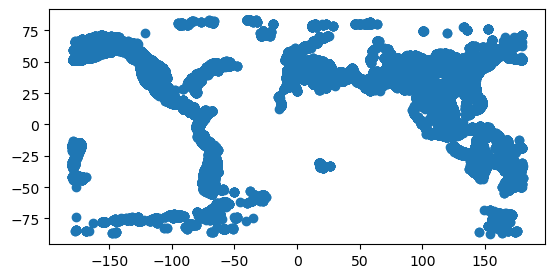

In [19]:
#'''
df = joymap.select_orogens(df,gdf=None, 
                           orogen_names=['Cordilleran', 
                                         'Terra Australis', 
                                         'Solonker', 
                                         'Indosinian', 
                                         'Variscan-Hercynian',
                                         'Scotian',
                                         'Uralian',
                                         'Mongol',
                                         'Kazakh',
                                         'Caledonia',
                                         'Alpine-Himalayan'], 
                           #continent_names='South America',
                           #region=[-100, -50, -60, 20]
                          )
#'''
df.plot()

In [9]:
###########################################
MODEL = PaleomapDictionary
###########################################

region = [-180, 180, -89, 89]
#region = [-76, -66, -25, -12]
projection="Q20c"
perspective = [210, 35]

column_marker_size = '0.1c'
###########################################



time_bin_size = MODEL['time_bin_size']
space_bin_size = 1.

#calibration = 'Hu'
#mohometer_selection = ['la_yb_elevation']

calibration = 'luffi'
mohometer_selection = 50

anchor_plate_id = MODEL['anchor_plate_id']
raster_anchor_plate_id = MODEL['raster_anchor_plate_id']

reconstruction_model = MODEL['reconstruction_model']
raster_sequence = MODEL['raster_sequence']



if isinstance(mohometer_selection, list):
    mohometer_description_string = '|'.join(mohometer_selection)
else:
    mohometer_description_string = str(mohometer_selection)

    
    
for reconstruction_time in np.arange(0,MODEL['maximum_time']+time_bin_size,time_bin_size):
    
    fig = pygmt.Figure()

    binned_elevations = joymap.timeslice_plot(df, reconstruction_time,
                                              time_bin_size, space_bin_size, 
                                              fig, reconstruction_model, raster_sequence,  
                                              anchor_plate_id=anchor_plate_id, raster_anchor_plate_id=raster_anchor_plate_id,
                                              gc_interpolator_dict=gc_interpolator_dict, 
                                              calibration=calibration, mohometer_selection=mohometer_selection,
                                              region=region, projection=projection, perspective=perspective, 
                                              column_marker_size=column_marker_size,
                                              volcanics=None, return_type='binned_elevations')
    
    joymap.add_labels(fig, reconstruction_time, add_colorbar=True)
    
    fig.savefig('../images/sequence_{:s}/elevations_plus_volcanism_{:s}_{:s}_{:0.0f}Ma.png'.format(MODEL['name'],
                                                                                                   calibration,
                                                                                                   mohometer_description_string, 
                                                                                                   reconstruction_time))
    #fig.show(width=1000)
    
    fig = pygmt.Figure()

    binned_residuals = joymap.timeslice_plot(df, reconstruction_time,
                                             time_bin_size, space_bin_size, 
                                             fig, reconstruction_model, raster_sequence,
                                             anchor_plate_id=anchor_plate_id, raster_anchor_plate_id=raster_anchor_plate_id,
                                             gc_interpolator_dict=gc_interpolator_dict, 
                                             calibration=calibration, mohometer_selection=mohometer_selection,
                                             region=region, projection=projection, perspective=perspective, 
                                             column_marker_size=column_marker_size,
                                             volcanics=None, residuals=True, return_type='binned_residuals')
    
    joymap.add_labels(fig, reconstruction_time, add_colorbar=True, colorbar_title='Residual Elevation [m]')
    
    fig.savefig('../images/sequence_{:s}/elevation_residuals_{:s}_{:s}_{:0.0f}Ma.png'.format(MODEL['name'],
                                                                                   calibration,
                                                                                   mohometer_description_string, 
                                                                                   reconstruction_time))
    #fig.show(width=1000)
    
    joymap.residuals_crossplot(binned_elevations, binned_residuals,
                               fname='../images/sequence_{:s}/crossplot_{:s}_{:s}_{:0.1f}Ma.png'.format(MODEL['name'],
                                                                                                        calibration,
                                                                                                        mohometer_description_string, 
                                                                                                        reconstruction_time))
    #break
    


Number of samples after basic filtering 723951
Final number of samples passed = 424687
TODO implement min/max elevation cutoffs
Number of samples after basic filtering 723951
Final number of samples passed = 424687
TODO implement min/max elevation cutoffs
Number of samples after basic filtering 22040
Final number of samples passed = 10992
TODO implement min/max elevation cutoffs
Number of samples after basic filtering 22040
Final number of samples passed = 10992
TODO implement min/max elevation cutoffs
Number of samples after basic filtering 9574
Final number of samples passed = 5690
TODO implement min/max elevation cutoffs
Number of samples after basic filtering 9574
Final number of samples passed = 5690
TODO implement min/max elevation cutoffs
Number of samples after basic filtering 27587
Final number of samples passed = 14539
TODO implement min/max elevation cutoffs
Number of samples after basic filtering 27587
Final number of samples passed = 14539
TODO implement min/max elevation 

KeyError: 385.0

In [22]:
###########################################
MODEL = PaleomapDictionary
###########################################

region = [-180, 180, -89, 89]
#region = [-76, -66, -25, -12]
projection="Q40c"
perspective = [210, 35]

column_marker_size = '0.1c'
###########################################



time_bin_size = 20
space_bin_size = 1.

#calibration = 'Hu'
#mohometer_selection = ['la_yb_elevation']

calibration = 'luffi'
mohometer_selection = 50

anchor_plate_id = 0
raster_anchor_plate_id = 0

reconstruction_model = Reconstructions.fetch_Merdith2021()
raster_sequence = None

model_name = 'M2021'
model_maximum_time = 1000


if isinstance(mohometer_selection, list):
    mohometer_description_string = '|'.join(mohometer_selection)
else:
    mohometer_description_string = str(mohometer_selection)

    
    
for reconstruction_time in np.arange(0,model_maximum_time+time_bin_size,time_bin_size):
    
    fig = pygmt.Figure()
    
    fig.basemap(region=region, projection=projection, perspective=perspective, frame='afg')

    reconstruction_model.polygon_snapshot('continents', reconstruction_time).plot(fig, pen=None, perspective=perspective)

    reconstruction_model.plate_snapshot(reconstruction_time).plot_boundaries(fig, perspective=perspective)

    binned_elevations = joymap.timeslice_plot(df, reconstruction_time,
                                              time_bin_size, space_bin_size, 
                                              fig, reconstruction_model, raster_sequence, 
                                              anchor_plate_id=anchor_plate_id, raster_anchor_plate_id=raster_anchor_plate_id,
                                              gc_interpolator_dict=gc_interpolator_dict, 
                                              calibration=calibration, mohometer_selection=mohometer_selection,
                                              region=region, projection=projection, perspective=perspective, 
                                              column_marker_size=column_marker_size, 
                                              coastlines=False, volcanics=None, return_type='binned_elevations')
    
    #joymap.add_labels(fig, reconstruction_time, add_colorbar=True)
    
    fig.savefig('../images/sequence_{:s}/elevations_plus_volcanism_{:s}_{:s}_{:0.0f}Ma.png'.format(model_name,
                                                                                                   calibration,
                                                                                                   mohometer_description_string, 
                                                                                                   reconstruction_time))
    #fig.show(width=1000)
    
    '''
    fig = pygmt.Figure()

    binned_residuals = joymap.timeslice_plot(df, reconstruction_time,
                                             time_bin_size, space_bin_size, 
                                             fig, raster_sequence, reconstruction_model, 
                                             anchor_plate_id=anchor_plate_id, raster_anchor_plate_id=raster_anchor_plate_id,
                                             gc_interpolator_dict=gc_interpolator_dict, 
                                             calibration=calibration, mohometer_selection=mohometer_selection,
                                             region=region, projection=projection, perspective=perspective, 
                                             column_marker_size=column_marker_size,
                                             volcanics=None, residuals=True, return_type='binned_residuals')
    
    joymap.add_labels(fig, reconstruction_time, add_colorbar=True, colorbar_title='Residual Elevation [m]')
    
    fig.savefig('../images/sequence_{:s}/elevation_residuals_{:s}_{:s}_{:0.0f}Ma.png'.format(MODEL['name'],
                                                                                   calibration,
                                                                                   mohometer_description_string, 
                                                                                   reconstruction_time))
    #fig.show(width=1000)
    
    joymap.residuals_crossplot(binned_elevations, binned_residuals,
                               fname='../images/sequence_{:s}/crossplot_{:s}_{:s}_{:0.1f}Ma.png'.format(MODEL['name'],
                                                                                                        calibration,
                                                                                                        mohometer_description_string, 
                                                                                                        reconstruction_time))
    #break
    '''
    


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 432650
Final number of samples passed = 253901
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 45689
Final number of samples passed = 26993
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 38087
Final number of samples passed = 18785
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 4908
Final number of samples passed = 3247
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 7335
Final number of samples passed = 5062
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 17793
Final number of samples passed = 8640
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 4792
Final number of samples passed = 3301
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 2323
Final number of samples passed = 1582
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 7299
Final number of samples passed = 4099
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 11322
Final number of samples passed = 3834
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 2206
Final number of samples passed = 1719
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 5532
Final number of samples passed = 1863
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 917
Final number of samples passed = 771
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 1425
Final number of samples passed = 1070
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 7668
Final number of samples passed = 1996
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 1491
Final number of samples passed = 1264
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 3419
Final number of samples passed = 1650
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 3525
Final number of samples passed = 914
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 1338
Final number of samples passed = 920
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 5262
Final number of samples passed = 2922
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 7832
Final number of samples passed = 5477
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 4466
Final number of samples passed = 3296
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 2881
Final number of samples passed = 2471
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 3830
Final number of samples passed = 1921
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 1118
Final number of samples passed = 905
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 1340
Final number of samples passed = 864
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 3988
Final number of samples passed = 905
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 628
Final number of samples passed = 399
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 509
Final number of samples passed = 224
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 219
Final number of samples passed = 152
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 803
Final number of samples passed = 610
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 233
Final number of samples passed = 144
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 84
Final number of samples passed = 70
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 79
Final number of samples passed = 72
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 20
Final number of samples passed = 10
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 80
Final number of samples passed = 33
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 112
Final number of samples passed = 53
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 139
Final number of samples passed = 42
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 134
Final number of samples passed = 108
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 426
Final number of samples passed = 419
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 233
Final number of samples passed = 159
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 213
Final number of samples passed = 185
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 192
Final number of samples passed = 183
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 119
Final number of samples passed = 115
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 72
Final number of samples passed = 64
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 99
Final number of samples passed = 74
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 133
Final number of samples passed = 106
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 58
Final number of samples passed = 56
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 43
Final number of samples passed = 38
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 102
Final number of samples passed = 89
TODO implement min/max elevation cutoffs


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:640: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, pen=pen, color=color, **kwargs)
/Users/Simon/GIT/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:875: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(data = plot_file.name, color=color, style='f{:f}p/{:f}p+r+t'.format(float(gap), float(size)), **kwargs)


Number of samples after basic filtering 210
Final number of samples passed = 143
TODO implement min/max elevation cutoffs
